In [146]:
install.packages("funtimes")
library(funtimes)

also installing the dependencies 'mnormt', 'GPArotation', 'pbivnorm', 'htmlTable', 'proto', 'shape', 'coda', 'psych', 'lavaan', 'Hmisc', 'igraph', 'jpeg', 'png', 'glasso', 'fdrtool', 'gtools', 'pbapply', 'gsubfn', 'xtable', 'texreg', 'pander', 'fastDummies', 'checkmate', 'glmnet', 'arm', 'qgraph', 'clusterGeneration', 'mvtnorm', 'corpcor', 'MplusAutomation', 'graphicalVAR', 'rbibutils', 'strucchange', 'dbscan', 'Kendall', 'mlVAR', 'Rdpack', 'sandwich', 'vars'





  There is a binary version available but the source version is later:
      binary source needs_compilation
Hmisc  5.1-3  5.2-0              TRUE

  Binaries will be installed
package 'mnormt' successfully unpacked and MD5 sums checked
package 'GPArotation' successfully unpacked and MD5 sums checked
package 'pbivnorm' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'coda' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked
package 'lavaan' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'glasso' successfully unpacked and 

In [147]:
library(tidyverse)
library(xts)
library(zoo)
library(svglite)
library(TSstudio)
library(zoo)
library(dlm)
library(forecast)
library(expsmooth)
library(ggplot2)
library(ggfortify)
library(changepoint)
library(KFAS)
library(httpgd)
library(funtimes)

# Time series plots
# https://cran.rstudio.com/web/packages/ggfortify/vignettes/plot_ts.html

In [148]:
##########################
# First smooth, if data is missing from the original "y" series, replace it
# Only take values from 2005 Q1 to 2024Q1

# load data
dt1 <- read.csv("../data/HandelDiensten_raw.csv", sep = ",")
colnames(dt1)

[1] "Perioden"                                 
 [2] "X45.Autohandel.en..reparatie"             
 [3] "X451.Autohandel.en..reparatie"            
 [4] "X45111.Import.van.nieuwe.personenauto.s"  
 [5] "X452.Gespecialiseerde.autoreparatie"      
 [6] "X453.Handel.in.auto.onderdelen"           
 [7] "X454.Handel.en.reparatie.van.motorfietsen"
 [8] "X46.Groothandel.en.handelsbemiddeling"    
 [9] "X462.Groothandel.in.landbouwproducten"    
[10] "X463.Groothandel.in.voedingsmiddelen"     
[11] "X464.Groothandel.in.non.food"             
[12] "X466.Groothandel.in.industriemachines"    
[13] "X467.Overige.gespecialiseerde.groothandel"
[14] "X47.Detailhandel..niet.in.auto.s."        
[15] "X471.Supermarkten.en.warenhuizen"         
[16] "X4711.Supermarkten"                       
[17] "X4711..472.Winkels.in.voedingsmiddelen"   
[18] "X472.Winkels.in.voedingsmiddelen"         
[19] "X474.Winkels.in.consumentenelektronica"   
[20] "X475.Winkels.in.overige.huishoudwaren"    
[21] "X4752.Winkels.in.doe.het.zelfartikelen"   
[22] "X47528.Bouwmarkten"                       
[23] "X4759.Winkels.overige.huishoudartikelen"  
[24] "X476.Winkels.in.recreatieartikelen"       
[25] "X477.Winkels.in.overige.artikelen"        
[26] "X4771.Winkels.in.kleding"                 
[27] "X4772.Winkels.in.schoenen.en.lederwaren"  
[28] "X47741.Drogisterijen"                     
[29] "X479.Detailhandel..geen.winkel.of.markt"  
[30] "X4791.Postorderbedrijven..webwinkels"     
[31] "X49.Vervoer.over.land"                    
[32] "X50.Vervoer.over.water"                   
[33] "X51.Vervoer.door.de.lucht"                
[34] "X52.Opslag..dienstverlening.voor.vervoer" 
[35] "X53.Post.en.koeriers"                     
[36] "X55.Logiesverstrekking"                   
[37] "X56.Eet..en.drinkgelegenheden"            
[38] "X58.Uitgeverijen"                         
[39] "X59.Film..en.tv.productie..geluidsopname" 
[40] "X60.Radio..en.televisieomroepen"          
[41] "X61.Telecommunicatie"                     
[42] "X62.IT.dienstverlening"                   
[43] "X63.Diensten.op.het.gebied.van.informatie"
[44] "X68.Verhuur.en.handel.van.onroerend.goed" 
[45] "X71.Architecten...ingenieursbureaus.e.d." 
[46] "X73.Reclamewezen.en.marktonderzoek"       
[47] "X74.Design..fotografie..vertaalbureaus"   
[48] "X79.Reisbureaus..reisorganisatie.en..info"
[49] "X80.Beveiligings..en.opsporingsdiensten"  
[50] "X81.Schoonmaakbedrijven..hoveniers.e.d."  
[51] "X82.Overige.zakelijke.dienstverlening"    
[52] "Detailhandel.excl..auto.s..tankstations"  
[53] "G.Handel"                                 
[54] "H.Vervoer.en.opslag"                      
[55] "H.I.J.L.M.N.Totaal.dienstverlening"       
[56] "I.Horeca"                                 
[57] "J.Informatie.en.communicatie"             
[58] "L.Verhuur.en.handel.van.onroerend.goed"   
[59] "M.Specialistische.zakelijke.diensten"     
[60] "N.Verhuur.en.overige.zakelijke.diensten"  
[61] "Winkels.in.meubels..woninginrichting.alg" 
[62] "Winkels.in.non.food..dh.geen.winkel"

In [149]:

# series1 <- ts(dt1["Winkels.in.meubels..woninginrichting.alg"], frequency = 12, start=c(2000,1))
# series1 <- ts(dt1["X4791.Postorderbedrijven..webwinkels"], frequency = 12, start=c(2000,1))
series1 <- ts(dt1['Winkels.in.meubels..woninginrichting.alg'], frequency = 12, start=c(2000,1))
series1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,79.0,80.3,87.3,80.9,81.7,82.5,85.2,77.2,80.5,91.6,95.2,104.9
2001,86.6,82.2,95.2,86.9,91.1,90.4,88.5,81.9,85.1,105.3,102.1,106.5
2002,91.7,86.5,91.8,87.8,91.3,86.6,90.2,80.4,80.8,97.2,96.2,100.1
2003,91.0,84.6,87.4,84.9,86.1,77.9,83.4,71.7,79.3,92.2,85.6,96.6
2004,87.1,78.9,89.1,80.7,78.9,80.1,84.4,70.7,79.1,87.7,86.7,95.9
2005,83.1,78.0,86.3,80.1,78.6,79.3,82.5,76.0,80.7,91.1,92.2,101.3
2006,90.4,83.1,96.3,86.4,90.5,87.8,78.9,88.6,86.3,96.4,96.5,102.9
2007,95.7,87.5,98.5,84.5,93.4,92.3,92.9,88.9,89.5,101.0,99.0,103.5
2008,96.3,90.8,96.6,94.6,92.3,88.9,95.9,89.2,88.3,101.7,93.2,99.1
2009,91.5,83.7,89.4,84.4,83.6,82.1,88.7,77.3,81.3,94.4,86.1,94.6


In [150]:
#########################
# Which model to use
#########################

In [155]:
# Tests for Seasonality
library(seastests)
library(car)
library(lmtest)

###########################
# Trend or not?
###########################

p_value <- notrend_test(series1)$p.value

if (p_value > 0.05) {
  print("Has Trend")
  } else {print ("No Trend")}

###########################
# Additive or multiplictive?
###########################

decompose_series1 <- decompose(series1, "multiplicative")
decompose_series1_multiplicative <- decompose_series1$random
muladd_mul <- sqrt(mean(abs(decompose_series1_multiplicative)^2, na.rm=TRUE))

decompose_series1 <- decompose(series1, "additive")
decompose_series1_additive <- decompose_series1$random
muladd_add <- sqrt(mean(abs(decompose_series1_additive)^2, na.rm=TRUE))

if (muladd_mul < muladd_add) {
  print("Use Multiplicative")
  } else {print ("Use Additive")}

###########################
# Seasonnal or not
###########################

season_Check <- isSeasonal(series1)

if (season_Check == TRUE) {
  print("Use Seasonal")
  } else {print ("Use Non-Seasonal")}



[1] "Has Trend"
[1] "Use Multiplicative"
[1] "Use Seasonal"


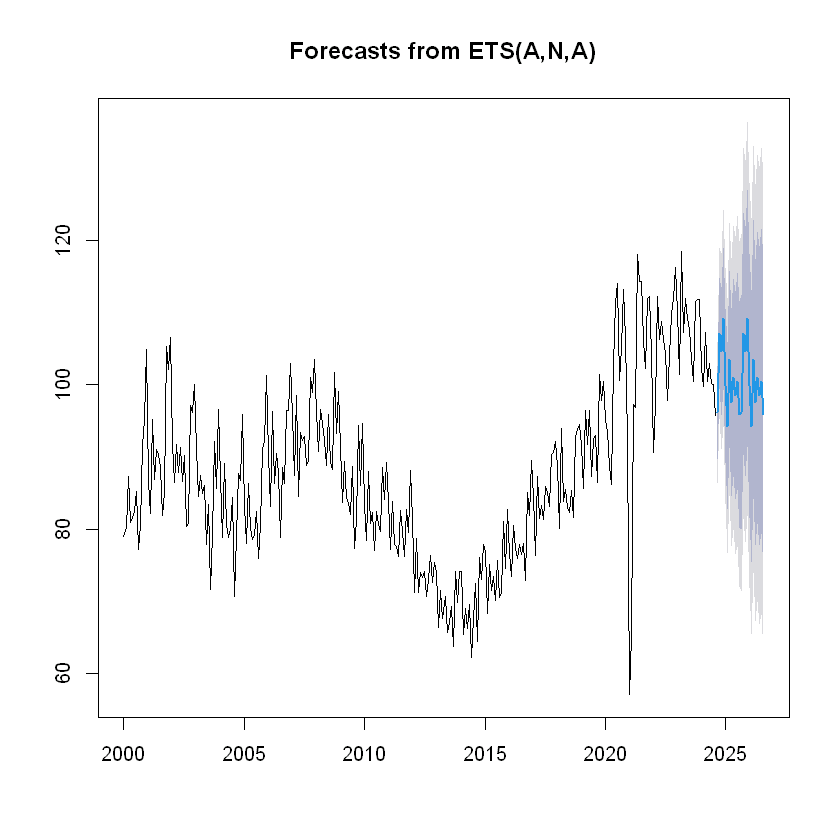

In [173]:
#ets(bonds, model="AAN", damped=TRUE)
#ets(usnetelec, model="MMN",damped=TRUE)
#ets(ukcars, model="ANA")#
#ets(visitors, model="MAM")

fit <- ets(series1, model="ANA", damped=FALSE)
#fit <- ets(series1, model="ANA", damped=FALSE)
plot(forecast(fit))

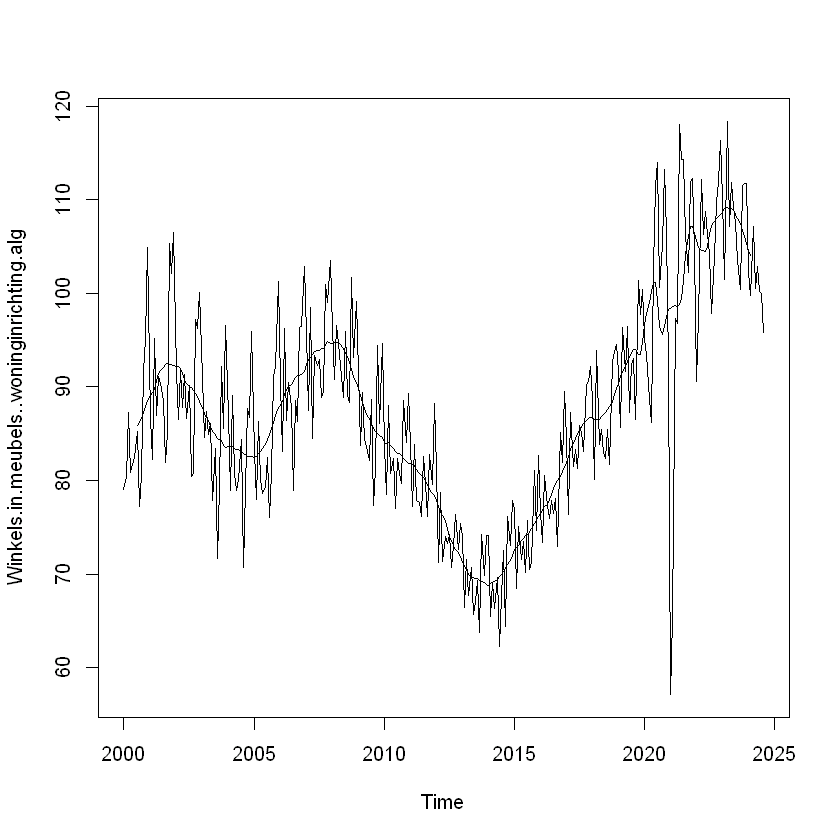

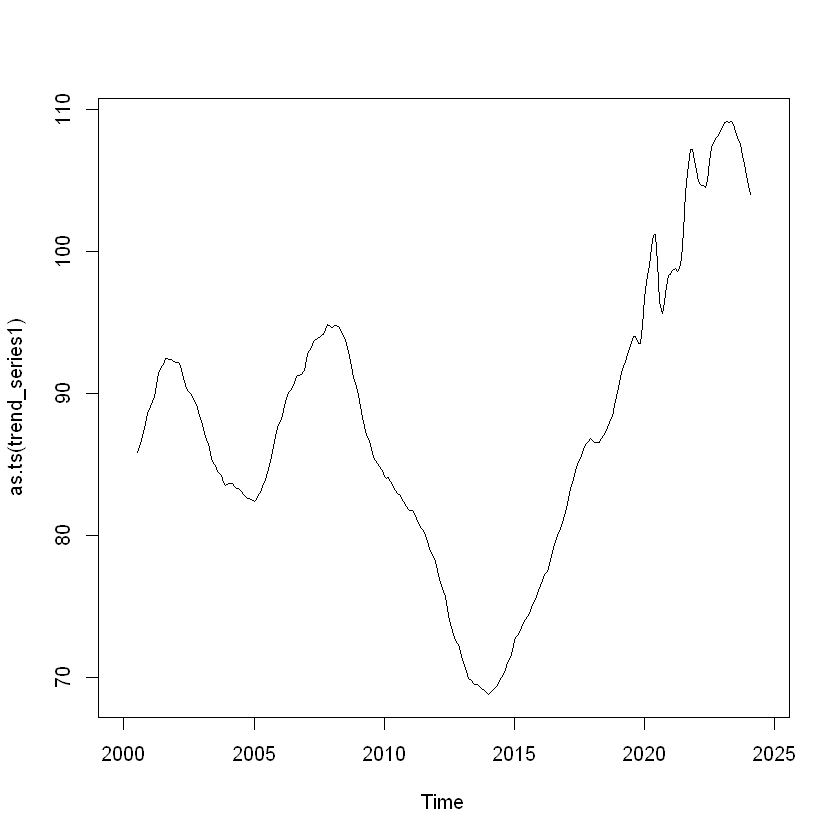

In [152]:
trend_series1 = ma(series1, order = 12, centre = T)
plot(as.ts(series1))
lines(trend_series1)
plot(as.ts(trend_series1))

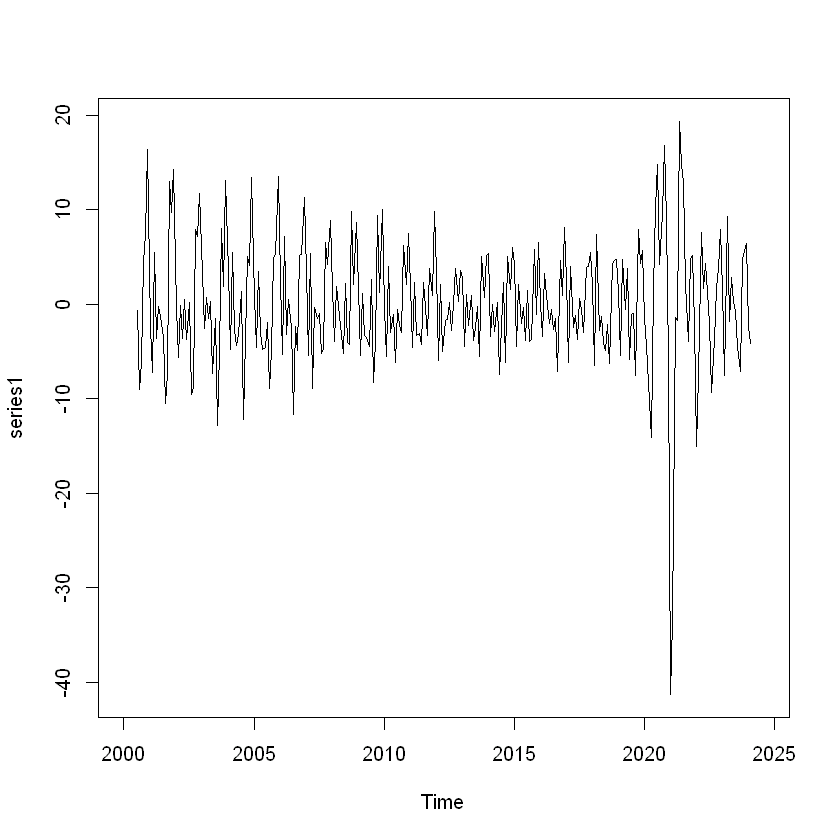

In [127]:
detrend_series1 = series1 - trend_series1
plot(as.ts(detrend_series1))

[1] 284.0178

[1] 1.001441

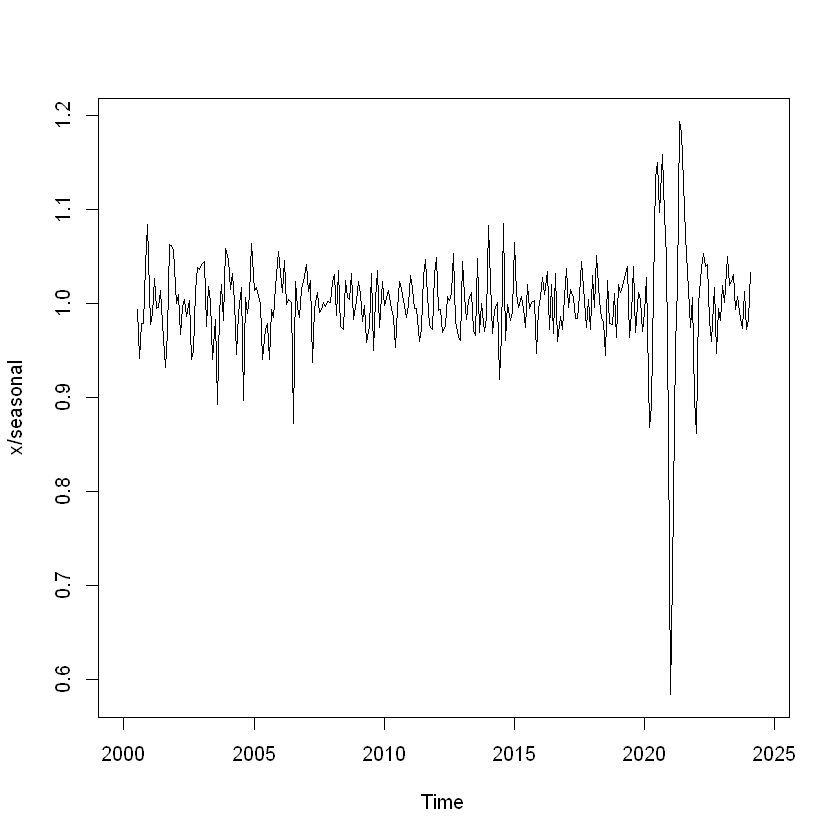

In [136]:
decompose_series1 <- decompose(series1, "multiplicative")
plot(decompose_series1$random)
decompose_series1_multiplicative <- decompose_series1$random
sum(abs(decompose_series1_multiplicative), na.rm=TRUE)

sqrt(mean(abs(decompose_series1_multiplicative)^2, na.rm=TRUE))


[1] 841.3465

[1] 4.94192

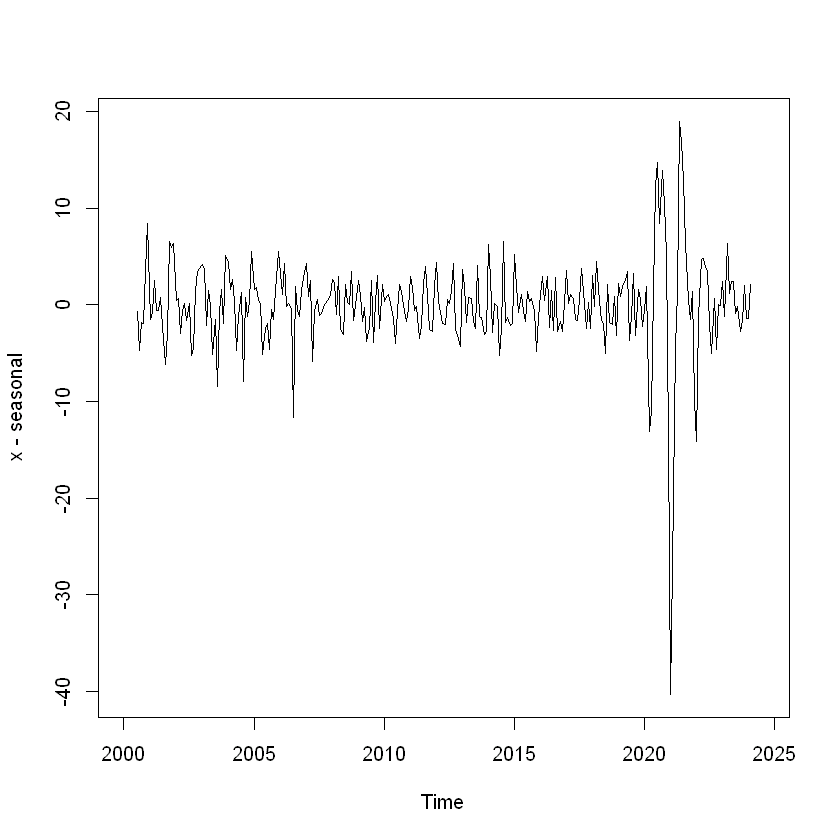

In [137]:
decompose_series1 <- decompose(series1, "additive")
plot(decompose_series1$random)
decompose_series1_additive <- decompose_series1$random
sum(abs(decompose_series1_additive), na.rm=TRUE)
sqrt(mean(abs(decompose_series1_additive)^2, na.rm=TRUE))

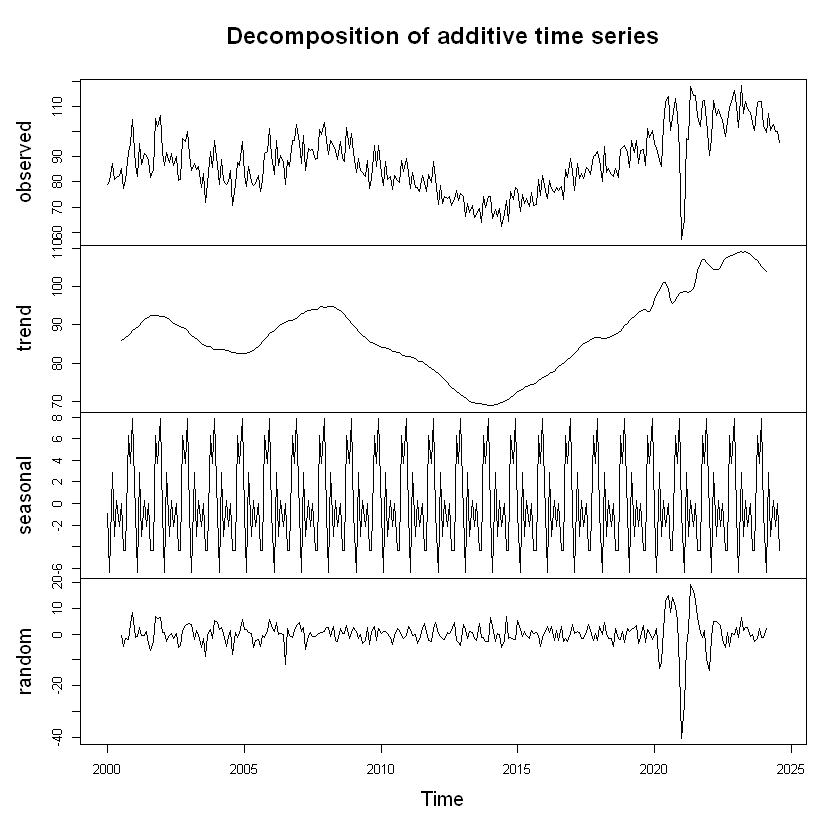

In [130]:
decompose_series1 <- decompose(series1, "additive")
plot(decompose_series1)

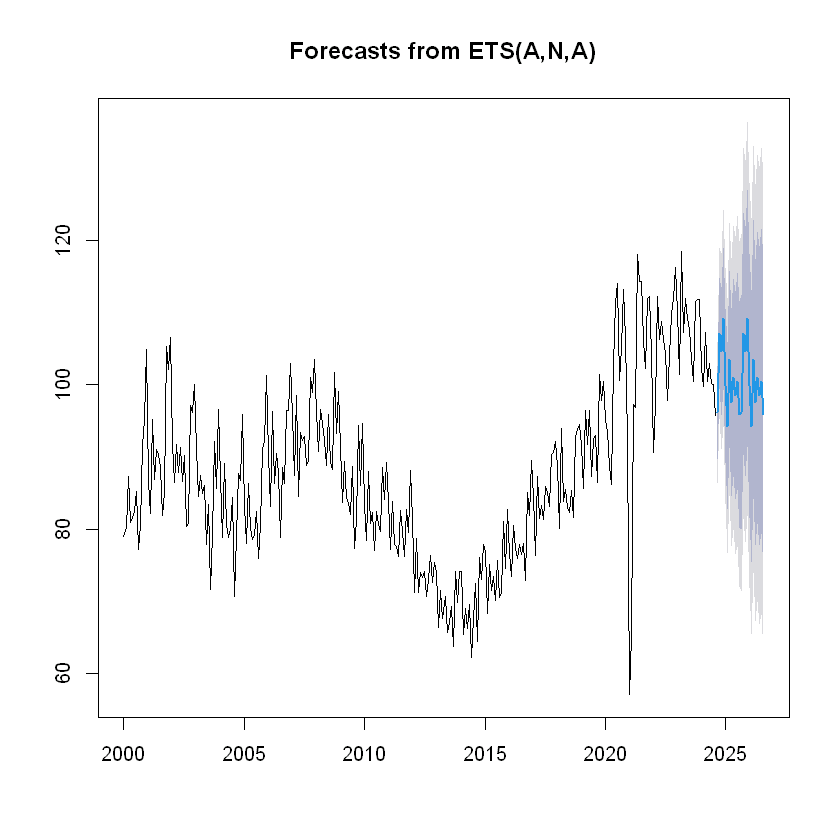

In [131]:

#ets(bonds, model="AAN", damped=TRUE)
#ets(usnetelec, model="MMN",damped=TRUE)
#ets(ukcars, model="ANA")
#ets(visitors, model="MAM")

fit <- ets(series1, model="ANA", damped=FALSE)
plot(forecast(fit))

In [132]:
forecast(fit)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 2024       96.10789 89.68562 102.5302 86.28588 105.9299
Oct 2024      107.17511 99.45034 114.8999 95.36109 118.9891
Nov 2024      104.61236 95.77500 113.4497 91.09678 118.1279
Dec 2024      109.22961 99.40487 119.0544 94.20396 124.2553
Jan 2025       99.91416 89.19258 110.6357 83.51692 116.3114
Feb 2025       94.28109 82.73211 105.8301 76.61845 111.9437
Mar 2025      103.58050 91.25956 115.9014 84.73724 122.4238
Apr 2025       97.55419 84.50688 110.6015 77.60005 117.5083
May 2025      100.99249 87.25717 114.7278 79.98613 121.9989
Jun 2025       98.51803 84.12755 112.9085 76.50970 120.5264
Jul 2025      100.53118 85.51411 115.5483 77.56455 123.4978
Aug 2025       95.93469 80.31219 111.5572 72.04214 119.8272
Sep 2025       96.10789 79.90637 112.3094 71.32981 120.8860
Oct 2025      107.17511 90.41457 123.9357 81.54208 132.8082
Nov 2025      104.61236 87.31084 121.9139 78.15197 131.0727
Dec 2025      109.22961 91.40353 127.055